In [5]:
# (1) Import libraries
import json
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
import time
from datetime import datetime
from scipy import stats

In [6]:
# (2) Reading json file
with open('trending.json','r',encoding='UTF-8') as load_f:
    load_dict=json.load(load_f)
    
# (3) Selecting the 'collector' list as main dataset
load_dict=load_dict['collector']
load_dict[1]

{'id': '6875468410612993286',
 'text': 'Quiet Zone... follow me on insta: joeysofo. Comment where you wanna see me blade next. Reply to @dwight_schnuute',
 'createTime': 1600819763,
 'authorMeta': {'id': '6729292817489986566',
  'secUid': 'MS4wLjABAAAAvkCSTiPWJm7Ctqp7AN3mauS_Bi8tVrbtBgnZnQKnc7nero0FEW0piU5AbzUO5nal',
  'name': 'joeysofo',
  'nickName': 'JoeySofo ',
  'verified': False,
  'signature': 'Tinder couldn’t help me lose my virginity so Im trying this app now\nIG: joeysofo',
  'avatar': 'https://p16-sign-va.tiktokcdn.com/musically-maliva-obj/c4614893d6e1b8f9c49d08ac5dc01b03~c5_1080x1080.jpeg?x-expires=1608649200&x-signature=HO8A0BXrA26B%2BrlO%2B1QkIfkrwm4%3D'},
 'musicMeta': {'musicId': '6678927595137977094',
  'musicName': 'Without Me',
  'musicAuthor': 'rapidsongs ',
  'musicOriginal': True,
  'playUrl': 'https://sf77-sg.tiktokcdn.com/obj/musically-maliva-obj/1630596382105654.mp3',
  'coverThumb': 'https://p16-sign-sg.tiktokcdn.com/musically-maliva-obj/1654351754080261~c5_10

In [7]:
# (4) Appending data in json to dataframe
df=pd.DataFrame(columns=load_dict[0].keys())
for dict in load_dict:
    df=df.append(dict,ignore_index=True)

# Before we deal with dictionaries nested in columns, we have noticed 
# that there will be two columns named 'id' in dataset. To avoid 
# potential information loss, we rename one of those columns to 'Id'.
# df.rename(columns={'id':'Id'},inplace=True)

In [8]:
# (5) Dividing the column containing dictionaries into new columns.
def dict_to_column(df,columns):
    for i in df[columns][0].keys():
        df[re.sub('Meta','',columns)+'_'+i]=[j[i] for j in df[columns]]
    df.drop(columns,axis=1,inplace=True)
    return df

def dict_parse(df):
    for i in df.keys():
        if type(df[i][0])==type({}) and df[i][0]!={}:
            df=dict_to_column(df,i)
    return df
        
df=dict_parse(df)

In [9]:
# (6) Export the dataframe as csv
df.to_csv("tiktok_mtp.csv", index=False)

In [10]:
df

,id,text,createTime,webVideoUrl,videoUrl,videoUrlNoWaterMark,diggCount,shareCount,playCount,commentCount,...,music_playUrl,music_coverThumb,music_coverMedium,music_coverLarge,covers_default,covers_origin,covers_dynamic,video_height,video_width,video_duration
0,6907228749016714497,Confidence went 📈,1608214517,https://www.tiktok.com/@ninakleij/video/690722...,https://v77.tiktokcdn.com/ed1f811617d7b5e18b8d...,,3710,50,44800,68,...,https://sf16-sg.tiktokcdn.com/obj/tos-alisg-v-...,https://p77-sg.tiktokcdn.com/aweme/100x100/tos...,https://p77-sg.tiktokcdn.com/aweme/200x200/tos...,https://p77-sg.tiktokcdn.com/aweme/720x720/tos...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,1024,576,15
1,6875468410612993286,Quiet Zone... follow me on insta: joeysofo. Co...,1600819763,https://www.tiktok.com/@joeysofo/video/6875468...,https://v77.tiktokcdn.com/ab935f1975cb8b69aebf...,,55700,1817,838100,936,...,https://sf77-sg.tiktokcdn.com/obj/musically-ma...,https://p16-sign-sg.tiktokcdn.com/musically-ma...,https://p77-sign-sg.tiktokcdn.com/musically-ma...,https://p77-sign-sg.tiktokcdn.com/musically-ma...,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,1024,576,11
2,6898699405898059010,Iphone bend test🤗 #tiktok #viral #fyp #iphone ...,1606228625,https://www.tiktok.com/@jackeyephone/video/689...,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,,936200,21100,15300000,27100,...,https://sf16-sg.tiktokcdn.com/obj/tos-alisg-v-...,https://p77-sg.tiktokcdn.com/aweme/100x100/tos...,https://p77-sg.tiktokcdn.com/aweme/200x200/tos...,https://p77-sg.tiktokcdn.com/aweme/720x720/tos...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,960,540,19
3,6902819837345533186,,1607187987,https://www.tiktok.com/@naomivaneeren/video/69...,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,,12900,197,94900,143,...,https://sf16-sg.tiktokcdn.com/obj/musically-ma...,https://p16-sign-va.tiktokcdn.com/musically-ma...,https://p16-sign-va.tiktokcdn.com/musically-ma...,https://p16-sign-va.tiktokcdn.com/musically-ma...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,1024,576,13
4,6905635666588192002,小技です👟✨#tiktok教室#tutorial,1607843600,https://www.tiktok.com/@io.dreamer_mk/video/69...,https://v77.tiktokcdn.com/7622979a5ceb97c6da4e...,,8805,198,115300,52,...,https://sf77-sg.tiktokcdn.com/obj/musically-ma...,https://p16-sign-sg.tiktokcdn.com/musically-ma...,https://p16-sign-sg.tiktokcdn.com/musically-ma...,https://p16-sign-sg.tiktokcdn.com/musically-ma...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,1024,576,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6877191692341054721,#foryou #foryoupage,1601220970,https://www.tiktok.com/@artistmiranda/video/68...,https://v77.tiktokcdn.com/12644d87ac40de1c1ab2...,,13300,152,129300,111,...,https://sf77-sg.tiktokcdn.com/obj/musically-ma...,https://p16-sign-sg.tiktokcdn.com/musically-ma...,https://p77-sign-sg.tiktokcdn.com/musically-ma...,https://p16-sign-sg.tiktokcdn.com/musically-ma...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,1024,576,13
996,6908069845825359109,Stop eating 💩 #gttfg #gotothegym #swolefam #nu...,1608410366,https://www.tiktok.com/@papaswolio/video/69080...,https://v77.tiktokcdn.com/740d0b0889f43900715c...,,12200,223,80700,321,...,https://sf16-sg.tiktokcdn.com/obj/musically-ma...,https://p16-sign-va.tiktokcdn.com/musically-ma...,https://p16-sign-va.tiktokcdn.com/musically-ma...,h

In [11]:
# (7) Change the string to time format 
df['createTime']=[time.strftime('%Y-%m-%d %I:%M:%S', time.localtime(i)) for i in df['createTime']]

In [12]:
# (8) Further change the time to date format 
df['Date'] = pd.to_datetime(df['createTime'], errors='coerce')

In [13]:
# (9) Extract the weekday in integer from the date 
df['Week Day'] = df['Date'].dt.dayofweek

In [14]:
# (10) Classify and map the weekday in integer to weekday in words
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
df['Day of Week']=df['Date'].dt.weekday.map(dw_mapping)

In [15]:
# (11) Extract the posting time from date 
df['Posting Time'] = df['Date'].dt.time

In [16]:
# (12) Extract the posting hour from date
df['Posting Hour'] = df['Date'].dt.hour

In [17]:
# (13) Convert the posting hour to actual format of hour
df["Hour"] = pd.to_datetime(df['Date'],format='%H').dt.time

In [18]:
# (13) Export the data to csv
df.to_csv("tiktok_11_Nov.csv", index=False)

In [19]:
# (14) Read relevant file to produce heatmap
df2 = pd.read_csv("hourSummary.csv")

In [20]:
# (15) Pivot Posting Hour, Day of Week and Sum of playCount
df_new = df2.pivot('Posting Hour','Day of Week','Sum of playCount')

In [21]:
# (16) Normalized the data to remove outliers
df_new_1 = df_new[(np.abs(stats.zscore(df_new)) < 2).all(axis=1)]

In [66]:
# (17) Export normalized data to csv
df_new_1.to_csv("for_heatmap.csv", index=True)

In [92]:
# (18) Reimport the normalized data in csv after adding rows to make it to 24 hours
df_hm = pd.read_csv("for_heatmap.csv")

In [93]:
# (19) Pivot and create heatmap data
hp_data = pd.pivot_table(df_hm, 
                     columns='Posting Hour')

Text(0.5, 1.0, 'Viewing Pattern of Tiktok Videos')

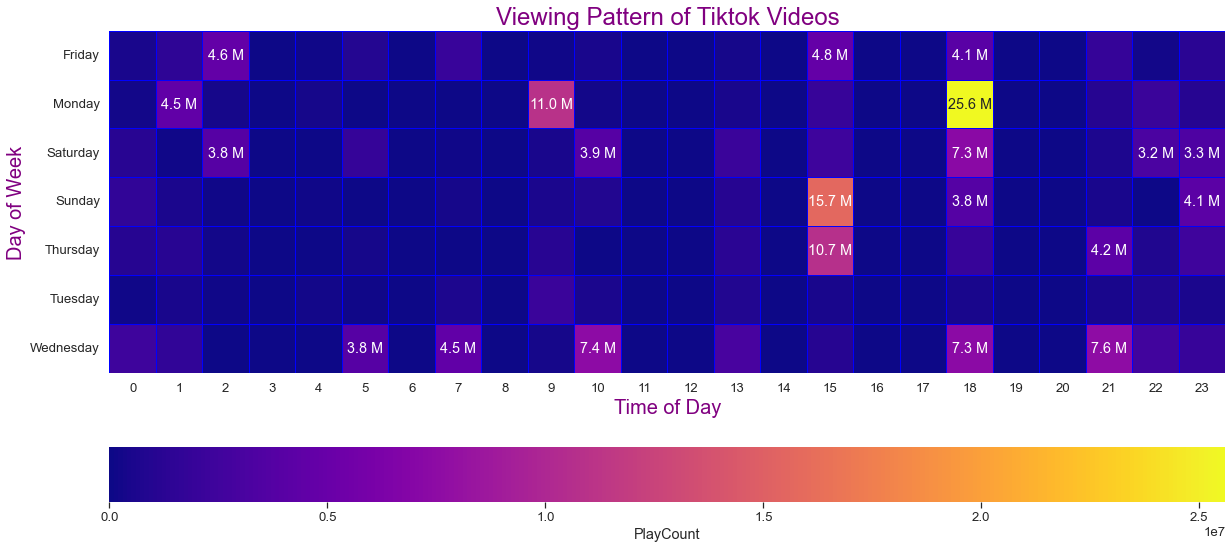

In [232]:
# (20) Create heatmap 

## Create a figure with subplot
fig, ax = plt.subplots(figsize=(20,9)) 

## Annotate certain data points with top views above 3 million (threshold)
label = ([['', '', '4.6 M','','','','','','','','','','','','','4.8 M','','','4.1 M','','','','',''],
          ['', '4.5 M', '','','','','','','','11.0 M','','','','','','','','','25.6 M','','','','',''],
          ['', '', '3.8 M','','','','','','','','3.9 M','','','','','','','','7.3 M','','','','3.2 M','3.3 M'],
          ['', '', '','','','','','','','','','','','','','15.7 M','','','3.8 M','','','','','4.1 M'],
          ['', '', '','','','','','','','','','','','','','10.7 M','','','','','','4.2 M','',''],
          ['', '', '','','','','','','','','','','','','','','','','','','','','',''],
          ['', '', '','','','3.8 M','','4.5 M','','','7.4 M','','','','','','','','7.3 M','','','7.6 M','','']])

## Set the scale of the font
sns.set(font_scale=1.2)

## Plot heatmap
sns.heatmap(hp_data, annot=label,fmt="", cmap="plasma", vmin=0, vmax=25600000, linewidths=0.5, linecolor="blue", cbar_kws={'label': 'PlayCount','orientation': 'horizontal'}, ax=ax)

## Label the heatmap 
plt.ylabel('Day of Week', color="Purple", fontsize=20)
plt.xlabel('Time of Day', color="Purple", fontsize=20)
plt.title('Viewing Pattern of Tiktok Videos', color="Purple", fontsize=24)
